In [6]:
### Imports ###
%matplotlib inline
%config IPCompleter.greedy=True
import matplotlib.pyplot as plt
import igraph
import numpy as np
from IPython.display import *
import pandas as pd


In [66]:
### Functions ###
def displayNetwork(g, visual_style={}):
    igraph.plot(g, "temp.png", **visual_style)
    display(Image(filename='temp.png'))

In [1]:
### Paths ###
DATA_PATH="Data/"

In [74]:
### Loading the data ###
sex        =pd.read_csv(DATA_PATH+"1100_sex.csv",index_col=0)
friendship =pd.read_csv(DATA_PATH+"1100_affective_w1.csv",index_col=0)
trust      =pd.read_csv(DATA_PATH+"1100_trust_w1.csv",index_col=0)

In [73]:
### Making the graph object ###
from igraph import ADJ_DIRECTED
A_fr = friendship.values
A_tr = trust.values
friend_graph=igraph.Graph.Weighted_Adjacency((A_fr).tolist(),mode=ADJ_DIRECTED, attr="weight", loops=False)
trust_graph=igraph.Graph.Weighted_Adjacency((A_tr).tolist(),mode=ADJ_DIRECTED, attr="weight", loops=False)
friend_graph.vs['sex'] = sex['sex'].values
trust_graph.vs['sex'] = sex['sex'].values

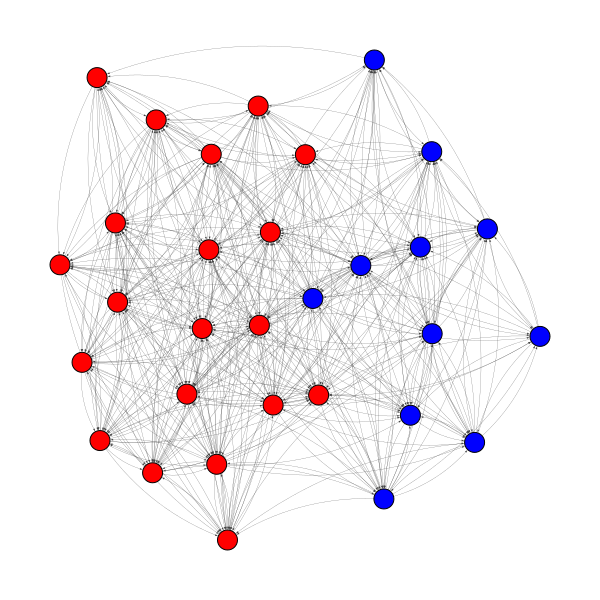

In [72]:
### Visualisation ###
visual_style = {}
visual_style["layout"] = friend_graph.layout_fruchterman_reingold()
visual_style["margin"] = 60
visual_style["edge_curved"] = 0.2
visual_style["edge_width"] = 0.2
visual_style["edge_arrow_size"] = 0.2
visual_style["edge_arrow_width"] = 1
visual_style["color"]=friend_graph.vs["sex"]

friend_graph.vs["sex"] = friend_graph.vs["sex"]
color_dict = {1: "blue", 2: "red"}
friend_graph.vs["color"] = [color_dict[gender] for gender in friend_graph.vs["sex"]]

displayNetwork(friend_graph,visual_style)

In [126]:
### Network parameters ###
# from igraph import IGRAPH_ALL
print ("Mean_degree =", np.mean(friend_graph.degree()))
print ("Betweenness =", friend_graph.betweenness(vertices=None, directed=True, cutoff=None, weights=None, nobigint=True))
print ("Transitivity_avglocal_undirected =", friend_graph.transitivity_avglocal_undirected(mode="nan"))
print ("Transitivity_undirected =", friend_graph.transitivity_undirected(mode="nan"))
print ("Transitivity_local_undirected=", friend_graph.transitivity_local_undirected(vertices=None, mode="nan", weights=None)) ## have a look
print ("Diameter=", friend_graph.diameter(directed=True, unconn=True, weights=None))
print ("Density=",friend_graph.density(loops=False))
print ("Diversity=", friend_graph.diversity(vertices=None, weights=None))
# print ("Triad_census=",friend_graph.triad_census())
print ("Vertex_connectivity=",friend_graph.vertex_connectivity(source=-1, target=-1, checks=True, neighbors="error"))
print ("Similarity_jaccard=",friend_graph.similarity_jaccard(vertices=None, pairs=None, mode=3, loops=True))
print ("Similarity_inverse_log_weighted=",friend_graph.similarity_inverse_log_weighted(vertices=None, mode=3))
print ("Similarity_dice=",friend_graph.similarity_dice(vertices=None, pairs=None, mode=3, loops=True))
print ("Assortativity=", friend_graph.assortativity(types1=friend_graph.vs["sex"], types2=None, directed=True))
print ("Assortativity_degree=", friend_graph.assortativity_degree(directed=True))
print ("Assortativity_nominal=", friend_graph.assortativity_nominal(types=friend_graph.vs["sex"], directed=True))
# print ("Community_fastgreedy=", friend_graph.community_fastgreedy(weights=None))
print (friend_graph.community_infomap( edge_weights=None, vertex_weights=None, trials=10))
# print (friend_graph.community_leading_eigenvector_naive(clusters=None, return_merges=False))
print (friend_graph.community_leading_eigenvector(clusters=None, weights=None, arpack_options=None))
print (friend_graph.community_label_propagation(weights=None, initial=None, fixed=None))
# print (friend_graph.community_multilevel( weights=None, return_levels=False))
print (friend_graph.community_edge_betweenness( clusters=None, directed=True, weights=None))
print (friend_graph.community_spinglass(weights=None, spins=25, parupdate=False, start_temp=1, stop_temp=0.01, cool_fact=0.99, update_rule="config", gamma=1, implementation="orig", lambda_=1))
print (friend_graph.community_walktrap( weights=None, steps=4))

# print ("Assortativity_nominal",friend_graph.assortativity_nominal(types, directed=True))
# print ("Motifs_randesu_estimate",friend_graph.motifs_randesu_estimate(size=3, cut_prob=None, sample)) # Look later

Mean_degree = 32.645161290322584
Betweenness = [22.97018353268353, 25.407024919524915, 5.297184084684083, 6.771193971193972, 5.6101773226773215, 11.334559659559657, 12.210199522699522, 6.031335331335331, 11.986497886497887, 9.190840765840766, 14.721366958866959, 8.500116325116325, 5.148401373401374, 18.063218500718502, 11.499760787260787, 9.840044452544452, 8.734910697410697, 41.8532691032691, 9.444960594960595, 23.376729426729423, 25.532728045228044, 9.100854475854476, 5.966339216339217, 10.7585261960262, 29.287821562821563, 18.75236013986014, 14.584574922074921, 30.747600447600448, 6.677060214560214, 5.518835331335332, 1.081324231324231]
Transitivity_avglocal_undirected = 0.8017234725495114
Transitivity_undirected = 0.7799407532797291
Transitivity_local_undirected= [0.29959514170040485, 0.3657219973009447, 0.49783549783549785, 0.32193732193732194, 0.3218390804597701, 0.2862903225806452, 0.3560606060606061, 0.48616600790513836, 0.2897727272727273, 0.31773399014778325, 0.31550802139037

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/igraph/__init__.py:1072: RuntimeWarning: This method was developed for undirected graphs at community.c:1565
  membership, _, q = GraphBase.community_leading_eigenvector(self, clusters, **kwds)


Clustering with 31 elements and 2 clusters
[0] 0, 2, 4, 11, 13, 14, 15, 16, 22, 23, 24, 25, 26, 28, 29
[1] 1, 3, 5, 6, 7, 8, 9, 10, 12, 17, 18, 19, 20, 21, 27, 30
Dendrogram, 31 elements, 30 merges

22 4 16 15 29 2 28 11 23 14 0 24 26 13 27 1 10 17 6 20 25 9 8 18 21 5 19 7 12 3 30
|  | |  |  |  | |  |  |  |  | |  |  |  |  | |  |  | |  |  | | |  |  | |  | |  | |
`--' |  |  |  | |  |  `--'  | |  |  |  |  | |  |  | |  |  `-' |  |  | |  | |  | |
 |   |  |  |  | |  |   |    | |  |  |  |  | |  |  | |  |   |  |  |  | |  | |  | |
 `---'  |  `--' `--'   `----' |  `--'  `--' |  `--' |  |   |  |  |  | |  | `--' |
   |    |   |    |       |    |   |     |   |   |   |  |   |  |  |  | |  |  |   |
   `----'   |    |       `----'   |     |   |   `---'  |   |  |  `--' |  |  |   |
     |      |    |         |      |     |   |     |    |   |  |   |   |  |  |   |
     `------'    |         `------'     `---'     `----'   `--'   |   `--'  `---'
        |        |            |           |         |       | 